<a href="https://colab.research.google.com/github/ShubhamW248/HypothesisTests/blob/main/TitanicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we analyze the Titanic dataset from Seaborn to explore factors that affect passenger survival and fare differences. We use hypothesis testing techniques to detect significant differences and associations.  
- *t-test:* Evaluates whether the average fare differs significantly between groups (e.g., passenger classes).  
- *Permutation test:* Uses random label shuffling to nonparametrically validate differences in group means.  
- *Chi-square test:* Tests for a significant association between categorical variables like passenger class and survival.


# Import Libraries and Load Data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Data Processing and EDA

Fare Summary by Class:
        count       mean        std  min       25%      50%   75%       max
pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500


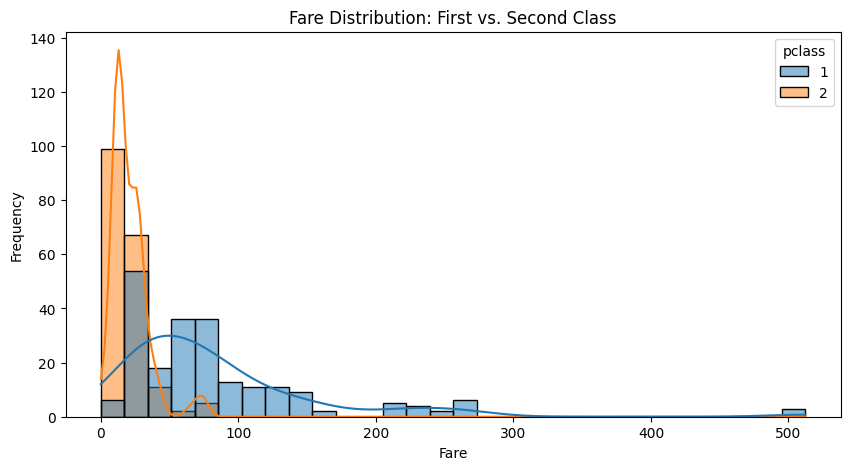

In [2]:
# Drop rows with missing values in columns of interest
data = titanic[['pclass', 'fare', 'survived', 'sex']].dropna()

# Convert pclass to string for categorical plots
data['pclass'] = data['pclass'].astype(str)

# Summary statistics for Fare by Passenger Class
print("Fare Summary by Class:")
print(data.groupby('pclass')['fare'].describe())

# Plot distribution of fares for first and second class
plt.figure(figsize=(10, 5))
sns.histplot(data=data[data['pclass'].isin(['1', '2'])], x='fare', hue='pclass', kde=True, bins=30)
plt.title("Fare Distribution: First vs. Second Class")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


# Independent Two‑Sample t‑Test (First vs. Second Class Fares)


In [3]:
# Extract fares for first-class and second-class passengers
fare_first = data[data['pclass'] == '1']['fare']
fare_second = data[data['pclass'] == '2']['fare']

# Perform a two-sample t-test (assuming unequal variances)
t_stat, p_value = stats.ttest_ind(fare_first, fare_second, equal_var=False)

print("Two-sample t-test (First vs. Second Class Fares):")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.5f}")

# Interpretation: If p_value < 0.05, we reject the null hypothesis that the means are equal.


Two-sample t-test (First vs. Second Class Fares):
t-statistic: 11.706, p-value: 0.00000


In [4]:
# Define a function for permutation test
def permutation_test(x, y, num_permutations=10000):
    observed_diff = np.mean(x) - np.mean(y)
    combined = np.concatenate([x, y])
    count = 0

    for _ in range(num_permutations):
        np.random.shuffle(combined)
        new_x = combined[:len(x)]
        new_y = combined[len(x):]
        perm_diff = np.mean(new_x) - np.mean(new_y)
        # For a two-sided test, count differences as extreme if they are at least as large as the observed difference.
        if np.abs(perm_diff) >= np.abs(observed_diff):
            count += 1

    p_val = (count + 1) / (num_permutations + 1)
    return observed_diff, p_val

# Run permutation test on fare difference between first and second class
obs_diff, perm_p_value = permutation_test(fare_first.values, fare_second.values)
print("Permutation Test (First vs. Second Class Fares):")
print(f"Observed difference: {obs_diff:.3f}, Permutation p-value: {perm_p_value:.5f}")


Permutation Test (First vs. Second Class Fares):
Observed difference: 63.493, Permutation p-value: 0.00010


# Chi‑Square Test for Association between Passenger Class and Survival




In [5]:
# Create a contingency table for passenger class and survival
contingency_table = pd.crosstab(data['pclass'], data['survived'])
print("Contingency Table (Passenger Class vs. Survival):")
print(contingency_table)

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("\nChi-Square Test:")
print(f"Chi2 statistic: {chi2:.3f}, p-value: {p:.5f}, Degrees of Freedom: {dof}")


Contingency Table (Passenger Class vs. Survival):
survived    0    1
pclass            
1          80  136
2          97   87
3         372  119

Chi-Square Test:
Chi2 statistic: 102.889, p-value: 0.00000, Degrees of Freedom: 2


# Summary and Result

In [6]:
print("Summary of Hypothesis Tests:")
print("1. t-test: A very small p-value indicates a statistically significant difference in average fares between first and second class.")
print("2. Permutation test: The p-value from the permutation test confirms the t-test results without assuming a specific distribution.")
print("3. Chi-Square test: A low p-value here would indicate a significant association between passenger class and survival outcome.")


Summary of Hypothesis Tests:
1. t-test: A very small p-value indicates a statistically significant difference in average fares between first and second class.
2. Permutation test: The p-value from the permutation test confirms the t-test results without assuming a specific distribution.
3. Chi-Square test: A low p-value here would indicate a significant association between passenger class and survival outcome.
